In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
DATA_FOLDER = '/Users/mmw/data/misp_data/'
data = pd.read_csv(f'{DATA_FOLDER}/lagged_comp-fundr-ibes_for_val_1976-2019.csv', index_col = 0)

In [3]:
data = data.replace([np.inf, -np.inf], np.nan)
# train val split: 1979-2009 train, 2010-2019 test
tr = data.loc[(1999 <= data['year']) & (data['year'] <= 2005)]
ts = data.loc[(2006 <= data['year']) & (data['year'] <= 2007)]
tr1 = tr.dropna(subset = ['ni_1'])
ts1 = ts.dropna(subset = ['ni_1'])

X_tr1 = tr1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts1 = ts1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr1 = tr1['ni_1']
y_ts1 = ts1['ni_1']

X_tr1 = X_tr1.fillna(0).astype(float)
X_ts1 = X_ts1.fillna(0).astype(float)

y_tr1 = y_tr1.astype(float)
y_ts1 = y_ts1.astype(float)

print(X_tr1.shape, X_ts1.shape, y_tr1.shape, y_ts1.shape)

(42374, 301) (10463, 301) (42374,) (10463,)


In [4]:
from datetime import datetime
for i in [3, 4, 5]:
    rf1 = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=i, n_jobs=-1)
    rf1.fit(X_tr1, y_tr1)
    yhat_tr1 = rf1.predict(X_tr1)
    yhat_ts1 = rf1.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(datetime.now(), i, inr2, outr2)
    
for i in [50, 100, 200]:
    rf1 = RandomForestRegressor(random_state=0, n_estimators=i, max_depth=4, n_jobs=-1)
    rf1.fit(X_tr1, y_tr1)
    yhat_tr1 = rf1.predict(X_tr1)
    yhat_ts1 = rf1.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(datetime.now(), i, inr2, outr2)

2020-10-21 02:34:03.396238 3 0.6658826836746674 0.7078487958617714
2020-10-21 02:34:21.798091 4 0.7452566482084798 0.7300860222006984
2020-10-21 02:34:47.124678 5 0.8024699037131211 0.7370222613807901
2020-10-21 02:34:58.296314 50 0.735176218224608 0.7319690303846784
2020-10-21 02:35:17.698866 100 0.7452566482084798 0.7300860222006984
2020-10-21 02:35:56.740802 200 0.7426245344397939 0.7340779047246799


In [ ]:
rf1 = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=4, n_jobs=-1)
rf1.fit(X_tr1, y_tr1)
yhat_tr1 = rf1.predict(X_tr1)
yhat_ts1 = rf1.predict(X_ts1)

<AxesSubplot:>

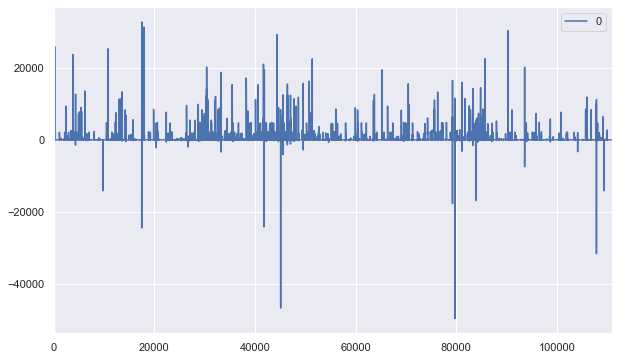

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
pd.DataFrame(yhat_ts1).plot()

<AxesSubplot:>

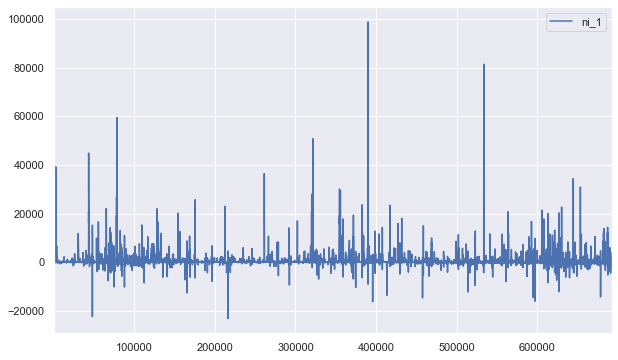

In [19]:
pd.DataFrame(y_ts1).plot()

In [23]:
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) 

def median_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median((-(y_true - y_pred) / y_true)) 

pls1_in_mdape = median_absolute_percentage_error(y_tr1, yhat_tr1[:])
pls1_out_mdape = median_absolute_percentage_error(y_ts1, yhat_ts1[:])
pls1_in_mdpe = median_percentage_error(y_tr1, yhat_tr1[:])
pls1_out_mdpe = median_percentage_error(y_ts1, yhat_ts1[:])
print(pls1_in_mdape, pls1_out_mdape, pls1_in_mdpe, pls1_out_mdpe)

3.0527723528203103 1.0372650452036316 -0.22707476837544832 -0.7855457466697813


/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


['ib' 'pi' 'intan' 'ebit_-5' 'ebitda_-5' 'niadj' 'debt_ebitda' 'ptpm' 'ni'
 'ocf_lct' 'ni_0' 'evm' 'gpm' 'ceq' 'opmad']


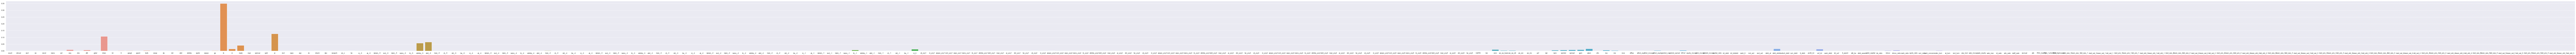

In [25]:
import seaborn as sns

print(np.asarray(list(X_ts1.keys()))[(np.abs(rf1.feature_importances_[:]).argsort()[-15:][::-1])])
rf1.score(X_ts1, y_ts1)
sns.set(rc={'figure.figsize':(300,6)})
ax = sns.barplot(x=list(X_ts1.keys()), y=rf1.feature_importances_[:])

['ib' 'pi' 'intan' 'ebit_-5' 'ebitda_-5' 'niadj' 'debt_ebitda' 'ptpm' 'ni'
 'ocf_lct' 'ni_0' 'evm' 'gpm' 'ceq' 'opmad']


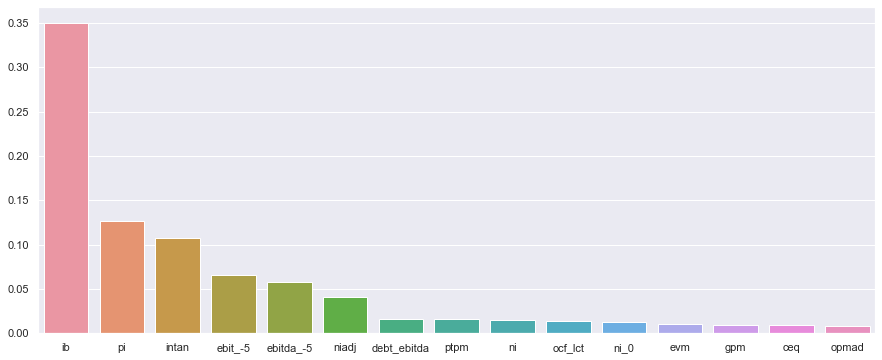

In [30]:
print(np.asarray(list(X_ts1.keys()))[(np.abs(rf1.feature_importances_[:]).argsort()[-15:][::-1])])
rf1.score(X_ts1, y_ts1)
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[rf1.feature_importances_[:].argsort()[-15:][::-1]], 
                  y=(rf1.feature_importances_[:][rf1.feature_importances_[:].argsort()[-15:][::-1]]))